In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Arial Unicode MS']  # Mac常用中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [2]:
import pandas as pd

# Step 1: 手动构建原始数据列表 (包含所有四张图片中的数据)
# 我们将所有行数据放入一个大的列表中，每一行是一个字典。
raw_data = []

# --- 第一张图片数据 ---
# 表头 (只添加一次)
headers = [
    '序', '代码', '名称', '最新', '涨幅', '涨跌', '成交量', '现量', '买一价', '卖一价',
    '涨速', '换手', '成交额', '市盈率', '所属行业', '最高', '最低', '开盘', '昨收', '振幅', '量比'
]

# 数据行 (第一张图片)
data_page1 = [
    {'序': '0', '代码': 'BK0157', '名称': '湖北板块', '最新': '20816.21', '涨幅': '+3.22%', '涨跌': '+649.67', '成交量': '43.8万手', '现量': '0手', '买一价': '--', '卖一价': '--', '涨速': '0.00%', '换手': '3.34%', '成交额': '629亿', '市盈率': '--', '所属行业': '--', '最高': '20818.38', '最低': '20291.38', '开盘': '20297.60', '昨收': '20166.54', '振幅': '0.00%', '量比': '--'},
    {'序': '1', '代码': '920198', '名称': '微创光电', '最新': '13.13', '涨幅': '+30.00%', '涨跌': '+3.03', '成交量': '22.8万手', '现量': '810手', '买一价': '13.13', '卖一价': '--', '涨速': '0.00%', '换手': '32.56%', '成交额': '2.82亿', '市盈率': '亏损②', '所属行业': '计算机设备', '最高': '13.13', '最低': '10.51', '开盘': '11.00', '昨收': '10.10', '振幅': '25.94%', '量比': '12.85'},
    {'序': '2', '代码': '920942', '名称': '恒立钻具', '最新': '47.80', '涨幅': '+22.66%', '涨跌': '+8.83', '成交量': '15.7万手', '现量': '2430手', '买一价': '47.76', '卖一价': '47.80', '涨速': '-0.06%', '换手': '38.28%', '成交额': '7.24亿', '市盈率': '101.11②', '所属行业': '专用设备', '最高': '49.99', '最低': '42.86', '开盘': '43.30', '昨收': '38.97', '振幅': '18.30%', '量比': '10.96'},
    {'序': '3', '代码': '300557', '名称': '理工光科', '最新': '30.64', '涨幅': '+20.02%', '涨跌': '+5.11', '成交量': '13.7万手', '现量': '887手', '买一价': '30.64', '卖一价': '--', '涨速': '0.00%', '换手': '11.52%', '成交额': '4.01亿', '市盈率': '78.84②', '所属行业': '仪器仪表', '最高': '30.64', '最低': '25.58', '开盘': '25.65', '昨收': '25.53', '振幅': '19.82%', '量比': '8.08'},
    {'序': '4', '代码': '300395', '名称': '菲利华', '最新': '80.50', '涨幅': '+14.17%', '涨跌': '+9.99', '成交量': '42.7万手', '现量': '4623手', '买一价': '80.49', '卖一价': '80.50', '涨速': '-0.07%', '换手': '8.31%', '成交额': '33.0亿', '市盈率': '94.81②', '所属行业': '非金属材料', '最高': '81.42', '最低': '72.00', '开盘': '72.00', '昨收': '70.51', '振幅': '13.36%', '量比': '2.85'},
    {'序': '5', '代码': '600681', '名称': '百川能源', '最新': '5.03', '涨幅': '+10.07%', '涨跌': '+0.46', '成交量': '136万手', '现量': '893手', '买一价': '5.03', '卖一价': '--', '涨速': '0.00%', '换手': '10.19%', '成交额': '6.43亿', '市盈率': '20.50②', '所属行业': '燃气', '最高': '5.03', '最低': '4.36', '开盘': '4.50', '昨收': '4.57', '振幅': '14.66%', '量比': '3.00'},
    {'序': '6', '代码': '000665', '名称': '湖北广电', '最新': '6.35', '涨幅': '+10.05%', '涨跌': '+0.58', '成交量': '97.3万手', '现量': '872手', '买一价': '6.35', '卖一价': '--', '涨速': '0.00%', '换手': '8.56%', '成交额': '6.18亿', '市盈率': '亏损③', '所属行业': '文化传媒', '最高': '6.35', '最低': '6.20', '开盘': '6.35', '昨收': '5.77', '振幅': '2.60%', '量比': '4.25'},
    {'序': '7', '代码': '600293', '名称': '三峡新材', '最新': '3.40', '涨幅': '+10.03%', '涨跌': '+0.31', '成交量': '99.7万手', '现量': '1919手', '买一价': '3.40', '卖一价': '--', '涨速': '0.00%', '换手': '8.59%', '成交额': '3.29亿', '市盈率': '亏损②', '所属行业': '玻璃玻纤', '最高': '3.40', '最低': '3.13', '开盘': '3.13', '昨收': '3.09', '振幅': '8.74%', '量比': '3.47'},
    {'序': '8', '代码': '001267', '名称': '汇绿生态', '最新': '17.88', '涨幅': '+10.03%', '涨跌': '+1.63', '成交量': '66.4万手', '现量': '625手', '买一价': '17.88', '卖一价': '--', '涨速': '0.00%', '换手': '10.95%', '成交额': '11.6亿', '市盈率': '187.11②', '所属行业': '工程建设', '最高': '17.88', '最低': '15.95', '开盘': '16.57', '昨收': '16.25', '振幅': '11.88%', '量比': '2.51'},
    {'序': '9', '代码': '600133', '名称': '东湖高新', '最新': '10.86', '涨幅': '+10.03%', '涨跌': '+0.99', '成交量': '95.1万手', '现量': '2322手', '买一价': '10.86', '卖一价': '--', '涨速': '0.00%', '换手': '8.92%', '成交额': '10.2亿', '市盈率': '117.73②', '所属行业': '环保行业', '最高': '10.86', '最低': '10.45', '开盘': '10.54', '昨收': '9.87', '振幅': '4.15%', '量比': '2.11'},
    {'序': '10', '代码': '601956', '名称': '东贝集团', '最新': '9.13', '涨幅': '+10.00%', '涨跌': '+0.83', '成交量': '92.3万手', '现量': '328手', '买一价': '9.13', '卖一价': '--', '涨速': '0.00%', '换手': '14.84%', '成交额': '7.97亿', '市盈率': '41.60②', '所属行业': '家电行业', '最高': '9.13', '最低': '8.16', '开盘': '8.20', '昨收': '8.30', '振幅': '11.69%', '量比': '1.64'},
    {'序': '11', '代码': '603067', '名称': '振华股份', '最新': '18.48', '涨幅': '+10.00%', '涨跌': '+1.68', '成交量': '21.4万手', '现量': '652手', '买一价': '18.48', '卖一价': '--', '涨速': '0.00%', '换手': '3.01%', '成交额': '3.92亿', '市盈率': '22.04②', '所属行业': '化学原料', '最高': '18.48', '最低': '17.86', '开盘': '17.86', '昨收': '16.80', '振幅': '3.69%', '量比': '1.07'},
    {'序': '12', '代码': '600745', '名称': '闻泰科技', '最新': '41.71', '涨幅': '+9.99%', '涨跌': '+3.79', '成交量': '174万手', '现量': '3389手', '买一价': '41.71', '卖一价': '--', '涨速': '0.00%', '换手': '14.01%', '成交额': '70.3亿', '市盈率': '54.79②', '所属行业': '半导体', '最高': '41.71', '最低': '38.03', '开盘': '38.03', '昨收': '37.92', '振幅': '9.70%', '量比': '1.17'},
    {'序': '13', '代码': '000759', '名称': '中百集团', '最新': '7.82', '涨幅': '+9.99%', '涨跌': '+0.71', '成交量': '99.9万手', '现量': '2929手', '买一价': '7.82', '卖一价': '--', '涨速': '0.00%', '换手': '15.24%', '成交额': '7.62亿', '市盈率': '亏损②', '所属行业': '商业百货', '最高': '7.82', '最低': '7.12', '开盘': '7.12', '昨收': '7.11', '振幅': '9.85%', '量比': '4.66'},
    {'序': '14', '代码': '600168', '名称': '武汉控股', '最新': '5.62', '涨幅': '+9.98%', '涨跌': '+0.51', '成交量': '20.0万手', '现量': '337手', '买一价': '5.62', '卖一价': '--', '涨速': '0.00%', '换手': '2.01%', '成交额': '1.12亿', '市盈率': '31.45②', '所属行业': '公用事业', '最高': '5.62', '最低': '5.62', '开盘': '5.62', '昨收': '5.11', '振幅': '0.00%', '量比': '1.94'},
    {'序': '15', '代码': '000852', '名称': '石化机械', '最新': '7.72', '涨幅': '+9.97%', '涨跌': '+0.70', '成交量': '27.9万手', '现量': '414手', '买一价': '7.72', '卖一价': '--', '涨速': '0.00%', '换手': '2.95%', '成交额': '2.16亿', '市盈率': '131.65②', '所属行业': '专用设备', '最高': '7.72', '最低': '7.72', '开盘': '7.72', '昨收': '7.02', '振幅': '0.00%', '量比': '2.06'},
    {'序': '16', '代码': '000952', '名称': '广济药业', '最新': '7.06', '涨幅': '+9.97%', '涨跌': '+0.64', '成交量': '21.6万手', '现量': '29手', '买一价': '7.06', '卖一价': '--', '涨速': '0.00%', '换手': '6.27%', '成交额': '1.50亿', '市盈率': '亏损②', '所属行业': '化学制药', '最高': '7.06', '最低': '6.47', '开盘': '6.48', '昨收': '6.42', '振幅': '9.19%', '量比': '4.62'},
    {'序': '17', '代码': '301048', '名称': '金鹰重工', '最新': '12.64', '涨幅': '+8.50%', '涨跌': '+0.99', '成交量': '22.4万手', '现量': '3453手', '买一价': '12.63', '卖一价': '12.64', '涨速': '0.08%', '换手': '4.20%', '成交额': '2.78亿', '市盈率': '35.59②', '所属行业': '交运设备', '最高': '12.86', '最低': '11.65', '开盘': '11.65', '昨收': '11.65', '振幅': '10.39%', '量比': '4.65'},
    {'序': '18', '代码': '300516', '名称': '久之洋', '最新': '39.08', '涨幅': '+8.11%', '涨跌': '+2.93', '成交量': '7.82万手', '现量': '1642手', '买一价': '39.08', '卖一价': '39.09', '涨速': '0.00%', '换手': '4.34%', '成交额': '3.02亿', '市盈率': '372.98②', '所属行业': '电子元件', '最高': '39.61', '最低': '36.80', '开盘': '36.80', '昨收': '36.15', '振幅': '7.77%', '量比': '3.71'},
    {'序': '19', '代码': '301183', '名称': '东田微', '最新': '103.50', '涨幅': '+7.86%', '涨跌': '+7.54', '成交量': '10.6万手', '现量': '1490手', '买一价': '103.50', '卖一价': '103.51', '涨速': '0.27%', '换手': '18.09%', '成交额': '10.7亿', '市盈率': '81.68②', '所属行业': '光学光电子', '最高': '103.53', '最低': '95.66', '开盘': '96.66', '昨收': '95.96', '振幅': '8.20%', '量比': '1.68'},
    {'序': '20', '代码': '600769', '名称': '祥龙电业', '最新': '14.35', '涨幅': '+7.17%', '涨跌': '+0.96', '成交量': '30.0万手', '现量': '2593手', '买一价': '14.34', '卖一价': '14.35', '涨速': '0.00%', '换手': '7.99%', '成交额': '4.26亿', '市盈率': '187.96②', '所属行业': '工程建设', '最高': '14.50', '最低': '13.63', '开盘': '13.99', '昨收': '13.39', '振幅': '6.50%', '量比': '1.17'},
    {'序': '21', '代码': '920274', '名称': '宏裕包材', '最新': '33.15', '涨幅': '+7.07%', '涨跌': '+2.19', '成交量': '5.63万手', '现量': '1502手', '买一价': '33.15', '卖一价': '33.16', '涨速': '0.00%', '换手': '6.92%', '成交额': '1.83亿', '市盈率': '110.41②', '所属行业': '塑料制品', '最高': '33.80', '最低': '31.29', '开盘': '31.89', '昨收': '30.96', '振幅': '8.11%', '量比': '4.17'},
    {'序': '22', '代码': '688081', '名称': '兴图新科', '最新': '29.53', '涨幅': '+6.99%', '涨跌': '+1.93', '成交量': '5.97万手', '现量': '510手', '买一价': '29.53', '卖一价': '29.54', '涨速': '0.10%', '换手': '5.80%', '成交额': '1.72亿', '市盈率': '亏损②', '所属行业': '通信服务', '最高': '29.75', '最低': '27.24', '开盘': '27.62', '昨收': '27.60', '振幅': '9.09%', '量比': '1.65'},
    {'序': '23', '代码': '300046', '名称': '台基股份', '最新': '40.65', '涨幅': '+6.92%', '涨跌': '+2.63', '成交量': '24.0万手', '现量': '3107手', '买一价': '40.65', '卖一价': '40.66', '涨速': '0.02%', '换手': '10.15%', '成交额': '9.65亿', '市盈率': '121.01②', '所属行业': '半导体', '最高': '41.55', '最低': '38.30', '开盘': '38.50', '昨收': '38.02', '振幅': '8.55%', '量比': '2.58'},
    {'序': '24', '代码': '601869', '名称': '长飞光纤', '最新': '87.98', '涨幅': '+6.86%', '涨跌': '+5.65', '成交量': '25.7万手', '现量': '2314手', '买一价': '87.98', '卖一价': '87.99', '涨速': '0.01%', '换手': '6.32%', '成交额': '22.3亿', '市盈率': '112.73②', '所属行业': '通信设备', '最高': '90.56', '最低': '81.54', '开盘': '82.49', '昨收': '82.33', '振幅': '10.96%', '量比': '2.26'},
    {'序': '25', '代码': '301211', '名称': '亨迪药业', '最新': '13.12', '涨幅': '+6.84%', '涨跌': '+0.84', '成交量': '19.1万手', '现量': '2415手', '买一价': '13.11', '卖一价': '13.12', '涨速': '0.00%', '换手': '4.57%', '成交额': '2.49亿', '市盈率': '147.70②', '所属行业': '化学制药', '最高': '13.48', '最低': '12.19', '开盘': '12.28', '昨收': '12.28', '振幅': '10.50%', '量比': '5.41'},
    {'序': '26', '代码': '301205', '名称': '联特科技', '最新': '95.80', '涨幅': '+6.55%', '涨跌': '+5.89', '成交量': '8.02万手', '现量': '1521手', '买一价': '95.79', '卖一价': '95.80', '涨速': '0.04%', '换手': '11.81%', '成交额': '7.52亿', '市盈率': '178.56②', '所属行业': '通信设备', '最高': '96.30', '最低': '88.70', '开盘': '89.95', '昨收': '89.91', '振幅': '8.45%', '量比': '1.54'},
    {'序': '27', '代码': '688545', '名称': '兴福电子', '最新': '37.17', '涨幅': '+6.20%', '涨跌': '+2.17', '成交量': '8.37万手', '现量': '944手', '买一价': '37.17', '卖一价': '37.18', '涨速': '0.00%', '换手': '11.48%', '成交额': '3.08亿', '市盈率': '64.08②', '所属行业': '电子化学品', '最高': '37.58', '最低': '35.08', '开盘': '35.08', '昨收': '35.00', '振幅': '7.14%', '量比': '0.83'},
]

# 将第一张图片的数据加入总列表
for row in data_page1:
    raw_data.append(row)

# --- 第二张图片数据 ---
# 注意：第二张图片开头也有一行“湖北板块”，我们不再添加，避免重复
data_page2 = [
    {'序': '28', '代码': '688143', '名称': '长盈通', '最新': '42.76', '涨幅': '+5.92%', '涨跌': '+2.39', '成交量': '3.58万手', '现量': '159手', '买一价': '42.76', '卖一价': '42.77', '涨速': '-0.05%', '换手': '3.79%', '成交额': '1.51亿', '市盈率': '94.58②', '所属行业': '电子元件', '最高': '42.97', '最低': '40.40', '开盘': '40.48', '昨收': '40.37', '振幅': '6.37%', '量比': '1.22'},
    {'序': '29', '代码': '601162', '名称': '天风证券', '最新': '5.38', '涨幅': '+5.70%', '涨跌': '+0.29', '成交量': '926万手', '现量': '9.05万手', '买一价': '5.37', '卖一价': '5.38', '涨速': '0.00%', '换手': '10.77%', '成交额': '50.2亿', '市盈率': '863.21②', '所属行业': '证券', '最高': '5.60', '最低': '5.16', '开盘': '5.16', '昨收': '5.09', '振幅': '8.64%', '量比': '5.53'},
    {'序': '30', '代码': '001359', '名称': '平安电工', '最新': '49.93', '涨幅': '+5.43%', '涨跌': '+2.57', '成交量': '2.89万手', '现量': '230手', '买一价': '49.91', '卖一价': '49.93', '涨速': '-0.12%', '换手': '6.22%', '成交额': '1.41亿', '市盈率': '34.29②', '所属行业': '非金属材料', '最高': '50.27', '最低': '47.35', '开盘': '47.60', '昨收': '47.36', '振幅': '6.17%', '量比': '1.45'},
    {'序': '31', '代码': '002305', '名称': '*ST南置', '最新': '2.71', '涨幅': '+5.04%', '涨跌': '+0.13', '成交量': '113万手', '现量': '2324手', '买一价': '2.71', '卖一价': '--', '涨速': '0.00%', '换手': '6.51%', '成交额': '3.01亿', '市盈率': '亏损②', '所属行业': '房地产开发', '最高': '2.71', '最低': '2.52', '开盘': '2.53', '昨收': '2.58', '振幅': '7.36%', '量比': '1.10'},
    {'序': '32', '代码': '300517', '名称': '海波重科', '最新': '11.95', '涨幅': '+5.01%', '涨跌': '+0.57', '成交量': '13.1万手', '现量': '861手', '买一价': '11.95', '卖一价': '11.96', '涨速': '0.08%', '换手': '10.54%', '成交额': '1.55亿', '市盈率': '347.49②', '所属行业': '工程建设', '最高': '12.20', '最低': '11.32', '开盘': '11.40', '昨收': '11.38', '振幅': '7.73%', '量比': '1.94'},
    {'序': '33', '代码': '600355', '名称': '*ST精伦', '最新': '3.57', '涨幅': '+5.00%', '涨跌': '+0.17', '成交量': '32.1万手', '现量': '109手', '买一价': '3.57', '卖一价': '--', '涨速': '0.00%', '换手': '6.53%', '成交额': '1.14亿', '市盈率': '亏损②', '所属行业': '通信设备', '最高': '3.57', '最低': '3.39', '开盘': '3.39', '昨收': '3.40', '振幅': '5.29%', '量比': '2.96'},
    {'序': '34', '代码': '002783', '名称': '凯龙股份', '最新': '10.36', '涨幅': '+4.96%', '涨跌': '+0.49', '成交量': '31.9万手', '现量': '8150手', '买一价': '10.35', '卖一价': '10.36', '涨速': '0.10%', '换手': '7.23%', '成交额': '3.26亿', '市盈率': '24.20②', '所属行业': '化学制品', '最高': '10.38', '最低': '9.92', '开盘': '9.94', '昨收': '9.87', '振幅': '4.66%', '量比': '3.30'},
    {'序': '35', '代码': '000501', '名称': '武商集团', '最新': '10.51', '涨幅': '+4.89%', '涨跌': '+0.49', '成交量': '40.1万手', '现量': '2658手', '买一价': '10.51', '卖一价': '10.52', '涨速': '0.00%', '换手': '5.21%', '成交额': '4.18亿', '市盈率': '24.45②', '所属行业': '商业百货', '最高': '10.79', '最低': '10.09', '开盘': '10.11', '昨收': '10.02', '振幅': '6.99%', '量比': '2.31'},
    {'序': '36', '代码': '002627', '名称': '三峡旅游', '最新': '6.14', '涨幅': '+4.78%', '涨跌': '+0.28', '成交量': '40.6万手', '现量': '3662手', '买一价': '6.14', '卖一价': '6.15', '涨速': '0.16%', '换手': '5.67%', '成交额': '2.46亿', '市盈率': '34.97②', '所属行业': '旅游酒店', '最高': '6.27', '最低': '5.84', '开盘': '5.85', '昨收': '5.86', '振幅': '7.34%', '量比': '2.34'},
    {'序': '37', '代码': '002861', '名称': '瀛通通讯', '最新': '19.53', '涨幅': '+4.66%', '涨跌': '+0.87', '成交量': '21.1万手', '现量': '3375手', '买一价': '19.53', '卖一价': '19.54', '涨速': '-0.15%', '换手': '14.02%', '成交额': '4.08亿', '市盈率': '亏损②', '所属行业': '消费电子', '最高': '19.99', '最低': '18.81', '开盘': '18.89', '昨收': '18.66', '振幅': '6.32%', '量比': '2.78'},
    {'序': '38', '代码': '002971', '名称': '和远气体', '最新': '37.58', '涨幅': '+4.16%', '涨跌': '+1.50', '成交量': '5.55万手', '现量': '823手', '买一价': '37.58', '卖一价': '37.60', '涨速': '0.08%', '换手': '3.45%', '成交额': '2.07亿', '市盈率': '80.93②', '所属行业': '化学制品', '最高': '38.30', '最低': '35.96', '开盘': '36.98', '昨收': '36.08', '振幅': '6.49%', '量比': '1.09'},
    {'序': '39', '代码': '688667', '名称': '菱电电控', '最新': '62.89', '涨幅': '+4.07%', '涨跌': '+2.46', '成交量': '5665手', '现量': '13手', '买一价': '62.79', '卖一价': '62.89', '涨速': '0.29%', '换手': '1.08%', '成交额': '3511万', '市盈率': '38.16②', '所属行业': '汽车零部件', '最高': '62.94', '最低': '60.43', '开盘': '60.74', '昨收': '60.43', '振幅': '4.15%', '量比': '1.04'},
    {'序': '40', '代码': '603950', '名称': '长源东谷', '最新': '37.52', '涨幅': '+3.99%', '涨跌': '+1.44', '成交量': '15.4万手', '现量': '503手', '买一价': '37.50', '卖一价': '37.52', '涨速': '-0.37%', '换手': '4.76%', '成交额': '5.62亿', '市盈率': '33.29③', '所属行业': '汽车零部件', '最高': '38.98', '最低': '34.89', '开盘': '38.98', '昨收': '36.08', '振幅': '11.34%', '量比': '2.48'},
    {'序': '41', '代码': '000988', '名称': '华工科技', '最新': '82.78', '涨幅': '+3.81%', '涨跌': '+3.04', '成交量': '74.5万手', '现量': '9089手', '买一价': '82.78', '卖一价': '82.79', '涨速': '-0.02%', '换手': '7.41%', '成交额': '61.2亿', '市盈率': '45.68②', '所属行业': '电子元件', '最高': '83.95', '最低': '79.69', '开盘': '80.80', '昨收': '79.74', '振幅': '5.34%', '量比': '1.25'},
    {'序': '42', '代码': '002377', '名称': '国创高新', '最新': '3.05', '涨幅': '+3.74%', '涨跌': '+0.11', '成交量': '27.5万手', '现量': '3952手', '买一价': '3.04', '卖一价': '3.05', '涨速': '0.00%', '换手': '3.16%', '成交额': '8272万', '市盈率': '8142.60②', '所属行业': '化学制品', '最高': '3.05', '最低': '2.94', '开盘': '2.95', '昨收': '2.94', '振幅': '3.74%', '量比': '2.31'},
    {'序': '43', '代码': '920108', '名称': '宏海科技', '最新': '15.75', '涨幅': '+3.62%', '涨跌': '+0.55', '成交量': '1.69万手', '现量': '562手', '买一价': '15.73', '卖一价': '15.75', '涨速': '-0.32%', '换手': '4.76%', '成交额': '2633万', '市盈率': '48.86②', '所属行业': '家电行业', '最高': '15.85', '最低': '15.22', '开盘': '15.29', '昨收': '15.20', '振幅': '4.14%', '量比': '0.88'},
    {'序': '44', '代码': '920779', '名称': '武汉蓝电', '最新': '41.24', '涨幅': '+3.59%', '涨跌': '+1.43', '成交量': '1.49万手', '现量': '247手', '买一价': '41.21', '卖一价': '41.24', '涨速': '0.15%', '换手': '7.43%', '成交额': '6124万', '市盈率': '55.81②', '所属行业': '仪器仪表', '最高': '41.45', '最低': '40.31', '开盘': '40.36', '昨收': '39.81', '振幅': '2.86%', '量比': '1.89'},
    {'序': '45', '代码': '000926', '名称': '福星股份', '最新': '2.64', '涨幅': '+3.53%', '涨跌': '+0.09', '成交量': '47.4万手', '现量': '5013手', '买一价': '2.63', '卖一价': '2.64', '涨速': '0.00%', '换手': '3.01%', '成交额': '1.24亿', '市盈率': '亏损②', '所属行业': '房地产开发', '最高': '2.65', '最低': '2.53', '开盘': '2.55', '昨收': '2.55', '振幅': '4.71%', '量比': '1.51'},
    {'序': '46', '代码': '300808', '名称': '久量股份', '最新': '29.31', '涨幅': '+3.46%', '涨跌': '+0.98', '成交量': '4.57万手', '现量': '812手', '买一价': '29.31', '卖一价': '29.32', '涨速': '0.45%', '换手': '3.84%', '成交额': '1.35亿', '市盈率': '亏损②', '所属行业': '光学光电子', '最高': '30.75', '最低': '28.33', '开盘': '28.34', '昨收': '28.33', '振幅': '8.54%', '量比': '1.35'},
    {'序': '47', '代码': '002281', '名称': '光迅科技', '最新': '61.42', '涨幅': '+3.45%', '涨跌': '+2.05', '成交量': '37.6万手', '现量': '5259手', '买一价': '61.42', '卖一价': '61.43', '涨速': '-0.05%', '换手': '4.82%', '成交额': '22.8亿', '市盈率': '66.54②', '所属行业': '通信设备', '最高': '61.80', '最低': '58.88', '开盘': '59.88', '昨收': '59.37', '振幅': '4.92%', '量比': '1.38'},
    {'序': '48', '代码': '000883', '名称': '湖北能源', '最新': '4.82', '涨幅': '+3.43%', '涨跌': '+0.16', '成交量': '106万手', '现量': '5457手', '买一价': '4.82', '卖一价': '4.83', '涨速': '0.00%', '换手': '1.64%', '成交额': '5.10亿', '市盈率': '16.33②', '所属行业': '电力行业', '最高': '4.97', '最低': '4.69', '开盘': '4.70', '昨收': '4.66', '振幅': '6.01%', '量比': '4.28'},
    {'序': '49', '代码': '688151', '名称': '华强科技', '最新': '21.95', '涨幅': '+3.34%', '涨跌': '+0.71', '成交量': '3.38万手', '现量': '389手', '买一价': '21.94', '卖一价': '21.95', '涨速': '-0.09%', '换手': '0.98%', '成交额': '7384万', '市盈率': '914.75②', '所属行业': '专用设备', '最高': '22.55', '最低': '21.08', '开盘': '21.20', '昨收': '21.24', '振幅': '6.92%', '量比': '0.97'},
    {'序': '50', '代码': '300184', '名称': '力源信息', '最新': '10.83', '涨幅': '+3.34%', '涨跌': '+0.35', '成交量': '53.1万手', '现量': '9785手', '买一价': '10.82', '卖一价': '10.83', '涨速': '0.00%', '换手': '5.06%', '成交额': '5.70亿', '市盈率': '65.01②', '所属行业': '贸易行业', '最高': '10.89', '最低': '10.45', '开盘': '10.50', '昨收': '10.48', '振幅': '4.20%', '量比': '0.99'},
    {'序': '51', '代码': '000826', '名称': '启迪环境', '最新': '2.27', '涨幅': '+3.18%', '涨跌': '+0.07', '成交量': '65.7万手', '现量': '1.56万手', '买一价': '2.26', '卖一价': '2.27', '涨速': '0.00%', '换手': '4.61%', '成交额': '1.47亿', '市盈率': '亏损②', '所属行业': '环保行业', '最高': '2.28', '最低': '2.17', '开盘': '2.20', '昨收': '2.20', '振幅': '5.00%', '量比': '0.98'},
    {'序': '52', '代码': '000707', '名称': '双环科技', '最新': '6.55', '涨幅': '+3.15%', '涨跌': '+0.20', '成交量': '13.5万手', '现量': '981手', '买一价': '6.54', '卖一价': '6.55', '涨速': '0.15%', '换手': '2.91%', '成交额': '8804万', '市盈率': '亏损②', '所属行业': '化学原料', '最高': '6.67', '最低': '6.34', '开盘': '6.39', '昨收': '6.35', '振幅': '5.20%', '量比': '2.83'},
    {'序': '53', '代码': '301235', '名称': '华康洁净', '最新': '34.74', '涨幅': '+3.06%', '涨跌': '+1.03', '成交量': '3.39万手', '现量': '660手', '买一价': '34.74', '卖一价': '34.75', '涨速': '-0.03%', '换手': '4.66%', '成交额': '1.17亿', '市盈率': '100.20②', '所属行业': '医疗服务', '最高': '34.78', '最低': '33.55', '开盘': '33.86', '昨收': '33.71', '振幅': '3.65%', '量比': '0.89'},
    {'序': '54', '代码': '688665', '名称': '四方光电', '最新': '59.71', '涨幅': '+2.95%', '涨跌': '+1.71', '成交量': '1.55万手', '现量': '182手', '买一价': '59.65', '卖一价': '59.71', '涨速': '0.39%', '换手': '1.54%', '成交额': '9161万', '市盈率': '35.69②', '所属行业': '仪器仪表', '最高': '60.65', '最低': '57.10', '开盘': '57.24', '昨收': '58.00', '振幅': '6.12%', '量比': '1.23'},
]

# 将第二张图片的数据加入总列表
for row in data_page2:
    raw_data.append(row)

# --- 第三张图片数据 ---
data_page3 = [
    {'序': '55', '代码': '300018', '名称': '中元股份', '最新': '10.93', '涨幅': '+2.92%', '涨跌': '+0.31', '成交量': '34.7万手', '现量': '5348手', '买一价': '10.92', '卖一价': '10.93', '涨速': '0.09%', '换手': '7.73%', '成交额': '3.73亿', '市盈率': '45.41②', '所属行业': '电网设备', '最高': '10.95', '最低': '10.45', '开盘': '10.61', '昨收': '10.62', '振幅': '4.71%', '量比': '0.71'},
    {'序': '56', '代码': '600654', '名称': '中安科', '最新': '3.27', '涨幅': '+2.83%', '涨跌': '+0.09', '成交量': '48.1万手', '现量': '4297手', '买一价': '3.27', '卖一价': '3.28', '涨速': '-0.30%', '换手': '2.08%', '成交额': '1.56亿', '市盈率': '1870.27②', '所属行业': '软件开发', '最高': '3.28', '最低': '3.17', '开盘': '3.18', '昨收': '3.18', '振幅': '3.46%', '量比': '1.48'},
    {'序': '57', '代码': '002072', '名称': '凯瑞德', '最新': '7.35', '涨幅': '+2.80%', '涨跌': '+0.20', '成交量': '5.50万手', '现量': '671手', '买一价': '7.35', '卖一价': '7.36', '涨速': '0.00%', '换手': '1.85%', '成交额': '3982万', '市盈率': '亏损②', '所属行业': '贸易行业', '最高': '7.38', '最低': '7.11', '开盘': '7.20', '昨收': '7.15', '振幅': '3.78%', '量比': '1.22'},
    {'序': '58', '代码': '002159', '名称': '三特索道', '最新': '15.17', '涨幅': '+2.78%', '涨跌': '+0.41', '成交量': '3.97万手', '现量': '331手', '买一价': '15.16', '卖一价': '15.17', '涨速': '-0.07%', '换手': '2.86%', '成交额': '5965万', '市盈率': '19.91②', '所属行业': '旅游酒店', '最高': '15.31', '最低': '14.72', '开盘': '14.73', '昨收': '14.76', '振幅': '4.00%', '量比': '2.01'},
    {'序': '59', '代码': '600568', '名称': 'ST中珠', '最新': '1.91', '涨幅': '+2.69%', '涨跌': '+0.05', '成交量': '20.8万手', '现量': '805手', '买一价': '1.90', '卖一价': '1.91', '涨速': '0.53%', '换手': '1.25%', '成交额': '3899万', '市盈率': '亏损②', '所属行业': '综合行业', '最高': '1.91', '最低': '1.83', '开盘': '1.85', '昨收': '1.86', '振幅': '4.30%', '量比': '1.11'},
    {'序': '60', '代码': '000783', '名称': '长江证券', '最新': '8.45', '涨幅': '+2.67%', '涨跌': '+0.22', '成交量': '150万手', '现量': '1.33万手', '买一价': '8.45', '卖一价': '8.46', '涨速': '-0.24%', '换手': '2.72%', '成交额': '12.8亿', '市盈率': '13.45②', '所属行业': '证券', '最高': '8.70', '最低': '8.27', '开盘': '8.28', '昨收': '8.23', '振幅': '5.22%', '量比': '1.72'},
    {'序': '61', '代码': '920438', '名称': '戈碧迦', '最新': '37.20', '涨幅': '+2.62%', '涨跌': '+0.95', '成交量': '5.58万手', '现量': '458手', '买一价': '37.20', '卖一价': '37.21', '涨速': '0.03%', '换手': '4.01%', '成交额': '2.02亿', '市盈率': '217.12②', '所属行业': '玻璃玻纤', '最高': '37.50', '最低': '34.74', '开盘': '36.44', '昨收': '36.25', '振幅': '7.61%', '量比': '1.46'},
    {'序': '62', '代码': '920870', '名称': '恒进感应', '最新': '19.45', '涨幅': '+2.58%', '涨跌': '+0.49', '成交量': '1.88万手', '现量': '288手', '买一价': '19.45', '卖一价': '19.46', '涨速': '0.00%', '换手': '2.85%', '成交额': '3625万', '市盈率': '170.63②', '所属行业': '专用设备', '最高': '19.49', '最低': '18.88', '开盘': '18.92', '昨收': '18.96', '振幅': '3.22%', '量比': '1.09'},
    {'序': '63', '代码': '600774', '名称': '汉商集团', '最新': '9.94', '涨幅': '+2.58%', '涨跌': '+0.25', '成交量': '7.47万手', '现量': '767手', '买一价': '9.93', '卖一价': '9.94', '涨速': '0.00%', '换手': '2.54%', '成交额': '7351万', '市盈率': '904.32②', '所属行业': '化学制药', '最高': '9.99', '最低': '9.60', '开盘': '9.68', '昨收': '9.69', '振幅': '4.02%', '量比': '1.65'},
    {'序': '64', '代码': '300567', '名称': '精测电子', '最新': '70.84', '涨幅': '+2.58%', '涨跌': '+1.78', '成交量': '4.89万手', '现量': '440手', '买一价': '70.84', '卖一价': '70.91', '涨速': '0.01%', '换手': '2.15%', '成交额': '3.46亿', '市盈率': '358.15②', '所属行业': '仪器仪表', '最高': '71.50', '最低': '69.56', '开盘': '69.56', '昨收': '69.06', '振幅': '2.81%', '量比': '0.57'},
    {'序': '65', '代码': '920273', '名称': '一致魔芋', '最新': '36.32', '涨幅': '+2.45%', '涨跌': '+0.87', '成交量': '1.32万手', '现量': '332手', '买一价': '36.30', '卖一价': '36.32', '涨速': '-0.03%', '换手': '1.95%', '成交额': '4744万', '市盈率': '45.79②', '所属行业': '食品饮料', '最高': '36.33', '最低': '35.12', '开盘': '35.45', '昨收': '35.45', '振幅': '3.41%', '量比': '0.51'},
    {'序': '66', '代码': '920146', '名称': '华阳变速', '最新': '10.02', '涨幅': '+2.45%', '涨跌': '+0.24', '成交量': '4.54万手', '现量': '635手', '买一价': '10.02', '卖一价': '10.03', '涨速': '-0.10%', '换手': '4.18%', '成交额': '4504万', '市盈率': '372.23②', '所属行业': '汽车零部件', '最高': '10.05', '最低': '9.71', '开盘': '9.96', '昨收': '9.78', '振幅': '3.48%', '量比': '1.12'},
    {'序': '67', '代码': '301127', '名称': '武汉天源', '最新': '13.49', '涨幅': '+2.43%', '涨跌': '+0.32', '成交量': '6.88万手', '现量': '800手', '买一价': '13.49', '卖一价': '13.50', '涨速': '0.15%', '换手': '1.03%', '成交额': '9177万', '市盈率': '34.86②', '所属行业': '环保行业', '最高': '13.65', '最低': '13.09', '开盘': '13.23', '昨收': '13.17', '振幅': '4.25%', '量比': '1.14'},
    {'序': '68', '代码': '600885', '名称': '宏发股份', '最新': '27.59', '涨幅': '+2.41%', '涨跌': '+0.65', '成交量': '37.7万手', '现量': '2096手', '买一价': '27.59', '卖一价': '27.60', '涨速': '-0.07%', '换手': '2.58%', '成交额': '10.4亿', '市盈率': '20.89②', '所属行业': '电网设备', '最高': '27.97', '最低': '27.01', '开盘': '27.28', '昨收': '26.94', '振幅': '3.56%', '量比': '0.78'},
    {'序': '69', '代码': '002694', '名称': '顾地科技', '最新': '4.26', '涨幅': '+2.40%', '涨跌': '+0.10', '成交量': '9.95万手', '现量': '509手', '买一价': '4.25', '卖一价': '4.26', '涨速': '0.24%', '换手': '1.38%', '成交额': '4198万', '市盈率': '亏损②', '所属行业': '装修建材', '最高': '4.26', '最低': '4.12', '开盘': '4.17', '昨收': '4.16', '振幅': '3.37%', '量比': '1.19'},
    {'序': '70', '代码': '000422', '名称': '湖北宜化', '最新': '13.49', '涨幅': '+2.27%', '涨跌': '+0.30', '成交量': '46.6万手', '现量': '5465手', '买一价': '13.49', '卖一价': '13.50', '涨速': '0.00%', '换手': '4.41%', '成交额': '6.27亿', '市盈率': '18.40②', '所属行业': '化肥行业', '最高': '13.85', '最低': '13.13', '开盘': '13.20', '昨收': '13.19', '振幅': '5.46%', '量比': '0.94'},
]

# 将第三张图片的数据加入总列表
for row in data_page3:
    raw_data.append(row)

# --- 第四张图片数据 ---
data_page4 = [
    {'序': '71', '代码': '605388', '名称': '均瑶健康', '最新': '7.50', '涨幅': '+2.18%', '涨跌': '+0.16', '成交量': '8.24万手', '现量': '2266手', '买一价': '7.49', '卖一价': '7.50', '涨速': '0.27%', '换手': '1.37%', '成交额': '6125万', '市盈率': '301.61②', '所属行业': '食品饮料', '最高': '7.50', '最低': '7.30', '开盘': '7.33', '昨收': '7.34', '振幅': '2.72%', '量比': '0.96'},
    {'序': '72', '代码': '600345', '名称': '长江通信', '最新': '27.27', '涨幅': '+2.17%', '涨跌': '+0.58', '成交量': '6.88万手', '现量': '871手', '买一价': '27.27', '卖一价': '27.28', '涨速': '-0.04%', '换手': '3.25%', '成交额': '1.86亿', '市盈率': '亏损②', '所属行业': '通信设备', '最高': '27.50', '最低': '26.52', '开盘': '26.52', '昨收': '26.69', '振幅': '3.67%', '量比': '1.40'},
    {'序': '73', '代码': '000785', '名称': '居然智家', '最新': '2.90', '涨幅': '+2.11%', '涨跌': '+0.06', '成交量': '61.6万手', '现量': '5338手', '买一价': '2.90', '卖一价': '2.91', '涨速': '0.00%', '换手': '1.04%', '成交额': '1.78亿', '市盈率': '27.50②', '所属行业': '商业百货', '最高': '2.91', '最低': '2.84', '开盘': '2.85', '昨收': '2.84', '振幅': '2.46%', '量比': '1.18'},
    {'序': '74', '代码': '300278', '名称': '华昌达', '最新': '5.42', '涨幅': '+2.07%', '涨跌': '+0.11', '成交量': '14.7万手', '现量': '1453手', '买一价': '5.42', '卖一价': '5.43', '涨速': '0.00%', '换手': '1.04%', '成交额': '7932万', '市盈率': '1461.22②', '所属行业': '通用设备', '最高': '5.43', '最低': '5.27', '开盘': '5.33', '昨收': '5.31', '振幅': '3.01%', '量比': '0.82'},
    {'序': '75', '代码': '300220', '名称': '金运激光', '最新': '15.45', '涨幅': '+2.05%', '涨跌': '+0.31', '成交量': '2.32万手', '现量': '696手', '买一价': '15.45', '卖一价': '15.46', '涨速': '-0.06%', '换手': '1.54%', '成交额': '3559万', '市盈率': '924.65②', '所属行业': '电子元件', '最高': '15.47', '最低': '15.01', '开盘': '15.14', '昨收': '15.14', '振幅': '3.04%', '量比': '0.98'},
    {'序': '76', '代码': '920237', '名称': '力佳科技', '最新': '25.83', '涨幅': '+1.97%', '涨跌': '+0.50', '成交量': '1.32万手', '现量': '117手', '买一价': '25.81', '卖一价': '25.83', '涨速': '0.35%', '换手': '1.56%', '成交额': '3385万', '市盈率': '54.74②', '所属行业': '电池', '最高': '25.92', '最低': '25.13', '开盘': '25.54', '昨收': '25.33', '振幅': '3.12%', '量比': '0.78'},
    {'序': '77', '代码': '002414', '名称': '高德红外', '最新': '12.54', '涨幅': '+1.95%', '涨跌': '+0.24', '成交量': '44.3万手', '现量': '8344手', '买一价': '12.54', '卖一价': '12.55', '涨速': '-0.08%', '换手': '1.30%', '成交额': '5.55亿', '市盈率': '148.00②', '所属行业': '电子元件', '最高': '12.64', '最低': '12.26', '开盘': '12.28', '昨收': '12.30', '振幅': '3.09%', '量比': '0.87'},
    {'序': '78', '代码': '603719', '名称': '良品铺子', '最新': '12.59', '涨幅': '+1.94%', '涨跌': '+0.24', '成交量': '3.96万手', '现量': '449手', '买一价': '12.58', '卖一价': '12.59', '涨速': '0.08%', '换手': '0.99%', '成交额': '4945万', '市盈率': '亏损②', '所属行业': '食品饮料', '最高': '12.62', '最低': '12.32', '开盘': '12.35', '昨收': '12.35', '振幅': '2.43%', '量比': '0.83'},
    {'序': '79', '代码': '603738', '名称': '泰晶科技', '最新': '14.80', '涨幅': '+1.86%', '涨跌': '+0.27', '成交量': '8.05万手', '现量': '913手', '买一价': '14.79', '卖一价': '14.80', '涨速': '0.00%', '换手': '2.09%', '成交额': '1.19亿', '市盈率': '129.55②', '所属行业': '电子元件', '最高': '14.97', '最低': '14.43', '开盘': '14.48', '昨收': '14.53', '振幅': '3.72%', '量比': '0.93'},
    {'序': '80', '代码': '300747', '名称': '锐科激光', '最新': '25.77', '涨幅': '+1.86%', '涨跌': '+0.47', '成交量': '8.54万手', '现量': '1573手', '买一价': '25.76', '卖一价': '25.77', '涨速': '-0.04%', '换手': '1.68%', '成交额': '2.20亿', '市盈率': '99.57②', '所属行业': '电子元件', '最高': '25.99', '最低': '25.28', '开盘': '25.52', '昨收': '25.30', '振幅': '2.81%', '量比': '0.73'},
    {'序': '81', '代码': '600976', '名称': '健民集团', '最新': '40.49', '涨幅': '+1.84%', '涨跌': '+0.73', '成交量': '1.55万手', '现量': '205手', '买一价': '40.49', '卖一价': '40.50', '涨速': '-0.02%', '换手': '1.01%', '成交额': '6258万', '市盈率': '16.30③', '所属行业': '中药', '最高': '40.64', '最低': '39.79', '开盘': '39.89', '昨收': '39.76', '振幅': '2.14%', '量比': '1.14'},
    {'序': '82', '代码': '688156', '名称': '路德环境', '最新': '19.53', '涨幅': '+1.77%', '涨跌': '+0.34', '成交量': '2.16万手', '现量': '56手', '买一价': '19.42', '卖一价': '19.53', '涨速': '0.00%', '换手': '2.15%', '成交额': '4182万', '市盈率': '亏损②', '所属行业': '农牧饲渔', '最高': '19.64', '最低': '18.98', '开盘': '19.17', '昨收': '19.19', '振幅': '3.44%', '量比': '0.89'},
    {'序': '83', '代码': '600035', '名称': '楚天高速', '最新': '4.14', '涨幅': '+1.72%', '涨跌': '+0.07', '成交量': '47.0万手', '现量': '1946手', '买一价': '4.14', '卖一价': '4.15', '涨速': '-0.24%', '换手': '2.92%', '成交额': '1.95亿', '市盈率': '8.27②', '所属行业': '铁路公路', '最高': '4.24', '最低': '4.07', '开盘': '4.09', '昨收': '4.07', '振幅': '4.18%', '量比': '3.13'},
    {'序': '84', '代码': '688646', '名称': 'ST逸飞', '最新': '30.89', '涨幅': '+1.71%', '涨跌': '+0.52', '成交量': '7890手', '现量': '10手', '买一价': '30.86', '卖一价': '30.89', '涨速': '0.19%', '换手': '1.34%', '成交额': '2431万', '市盈率': '80.99②', '所属行业': '专用设备', '最高': '31.10', '最低': '30.40', '开盘': '30.48', '昨收': '30.37', '振幅': '2.30%', '量比': '0.91'},
    {'序': '85', '代码': '688387', '名称': '信科移动-U', '最新': '6.63', '涨幅': '+1.69%', '涨跌': '+0.11', '成交量': '29.3万手', '现量': '2416手', '买一价': '6.63', '卖一价': '6.64', '涨速': '-0.30%', '换手': '1.45%', '成交额': '1.95亿', '市盈率': '亏损②', '所属行业': '通信设备', '最高': '6.75', '最低': '6.50', '开盘': '6.54', '昨收': '6.52', '振幅': '3.83%', '量比': '0.82'},
    {'序': '86', '代码': '688089', '名称': '嘉必优', '最新': '24.12', '涨幅': '+1.69%', '涨跌': '+0.40', '成交量': '2.22万手', '现量': '142手', '买一价': '24.12', '卖一价': '24.13', '涨速': '-0.08%', '换手': '1.32%', '成交额': '5334万', '市盈率': '18.80②', '所属行业': '食品饮料', '最高': '24.23', '最低': '23.72', '开盘': '23.82', '昨收': '23.72', '振幅': '2.15%', '量比': '0.58'},
    {'序': '87', '代码': '600421', '名称': '*ST华嵘', '最新': '7.46', '涨幅': '+1.63%', '涨跌': '+0.12', '成交量': '3.20万手', '现量': '466手', '买一价': '7.46', '卖一价': '7.47', '涨速': '-0.13%', '换手': '1.64%', '成交额': '2363万', '市盈率': '亏损②', '所属行业': '通用设备', '最高': '7.50', '最低': '7.25', '开盘': '7.30', '昨收': '7.34', '振幅': '3.41%', '量比': '1.25'},
    {'序': '88', '代码': '000670', '名称': '盈方微', '最新': '8.10', '涨幅': '+1.63%', '涨跌': '+0.13', '成交量': '23.1万手', '现量': '4106手', '买一价': '8.09', '卖一价': '8.10', '涨速': '-0.12%', '换手': '2.83%', '成交额': '1.87亿', '市盈率': '亏损②', '所属行业': '半导体', '最高': '8.15', '最低': '7.91', '开盘': '7.97', '昨收': '7.97', '振幅': '3.01%', '量比': '0.79'},
    {'序': '89', '代码': '300494', '名称': '盛天网络', '最新': '13.12', '涨幅': '+1.63%', '涨跌': '+0.21', '成交量': '9.81万手', '现量': '2204手', '买一价': '13.12', '卖一价': '13.13', '涨速': '-0.08%', '换手': '2.46%', '成交额': '1.28亿', '市盈率': '61.52②', '所属行业': '游戏', '最高': '13.14', '最低': '12.87', '开盘': '12.91', '昨收': '12.91', '振幅': '2.09%', '量比': '0.66'},
    {'序': '90', '代码': '300323', '名称': '华灿光电', '最新': '8.15', '涨幅': '+1.62%', '涨跌': '+0.13', '成交量': '19.9万手', '现量': '2751手', '买一价': '8.15', '卖一价': '8.16', '涨速': '0.00%', '换手': '2.26%', '成交额': '1.62亿', '市盈率': '亏损②', '所属行业': '光学光电子', '最高': '8.26', '最低': '8.04', '开盘': '8.07', '昨收': '8.02', '振幅': '2.74%', '量比': '0.61'},
    {'序': '91', '代码': '300871', '名称': '回盛生物', '最新': '21.12', '涨幅': '+1.59%', '涨跌': '+0.33', '成交量': '4.28万手', '现量': '432手', '买一价': '21.12', '卖一价': '21.13', '涨速': '0.00%', '换手': '2.11%', '成交额': '8942万', '市盈率': '18.23②', '所属行业': '农药兽药', '最高': '21.12', '最低': '20.68', '开盘': '20.70', '昨收': '20.79', '振幅': '2.12%', '量比': '1.02'},
    {'序': '92', '代码': '000553', '名称': '安道麦A', '最新': '6.57', '涨幅': '+1.55%', '涨跌': '+0.10', '成交量': '4.92万手', '现量': '360手', '买一价': '6.57', '卖一价': '6.58', '涨速': '0.15%', '换手': '0.23%', '成交额': '3224万', '市盈率': '亏损②', '所属行业': '农药兽药', '最高': '6.59', '最低': '6.47', '开盘': '6.51', '昨收': '6.47', '振幅': '1.85%', '量比': '0.95'},
    {'序': '93', '代码': '600757', '名称': '长江传媒', '最新': '8.72', '涨幅': '+1.51%', '涨跌': '+0.13', '成交量': '24.3万手', '现量': '5661手', '买一价': '8.72', '卖一价': '8.73', '涨速': '-0.23%', '换手': '2.00%', '成交额': '2.12亿', '市盈率': '7.72②', '所属行业': '文化传媒', '最高': '8.88', '最低': '8.57', '开盘': '8.59', '昨收': '8.59', '振幅': '3.61%', '量比': '1.65'},
    {'序': '94', '代码': '300161', '名称': '华中数控', '最新': '28.36', '涨幅': '+1.43%', '涨跌': '+0.40', '成交量': '2.27万手', '现量': '203手', '买一价': '28.35', '卖一价': '28.36', '涨速': '0.00%', '换手': '1.16%', '成交额': '6411万', '市盈率': '亏损②', '所属行业': '通用设备', '最高': '28.58', '最低': '27.82', '开盘': '28.20', '昨收': '27.96', '振幅': '2.72%', '量比': '0.68'},
    {'序': '95', '代码': '300387', '名称': '富邦科技', '最新': '9.25', '涨幅': '+1.43%', '涨跌': '+0.13', '成交量': '4.79万手', '现量': '2005手', '买一价': '9.24', '卖一价': '9.25', '涨速': '0.11%', '换手': '1.66%', '成交额': '4400万', '市盈率': '21.84②', '所属行业': '化肥行业', '最高': '9.25', '最低': '9.05', '开盘': '9.10', '昨收': '9.12', '振幅': '2.19%', '量比': '0.85'},
    {'序': '96', '代码': '300776', '名称': '帝尔激光', '最新': '67.45', '涨幅': '+1.37%', '涨跌': '+0.91', '成交量': '2.57万手', '现量': '430手', '买一价': '67.44', '卖一价': '67.45', '涨速': '0.00%', '换手': '1.53%', '成交额': '1.72亿', '市盈率': '28.24②', '所属行业': '光伏设备', '最高': '67.95', '最低': '65.96', '开盘': '66.23', '昨收': '66.54', '振幅': '2.99%', '量比': '0.72'},
    {'序': '97', '代码': '301150', '名称': '中一科技', '最新': '37.52', '涨幅': '+1.35%', '涨跌': '+0.50', '成交量': '10.9万手', '现量': '842手', '买一价': '37.51', '卖一价': '37.52', '涨速': '-0.03%', '换手': '4.89%', '成交额': '4.03亿', '市盈率': '285.73②', '所属行业': '电池', '最高': '38.29', '最低': '36.20', '开盘': '37.39', '昨收': '37.02', '振幅': '5.65%', '量比': '1.06'},
    {'序': '98', '代码': '301633', '名称': '港迪技术', '最新': '75.66', '涨幅': '+1.31%', '涨跌': '+0.98', '成交量': '3147手', '现量': '31手', '买一价': '75.65', '卖一价': '75.66', '涨速': '-0.03%', '换手': '2.26%', '成交额': '2376万', '市盈率': '114.36②', '所属行业': '通用设备', '最高': '75.80', '最低': '74.34', '开盘': '74.75', '昨收': '74.68', '振幅': '1.96%', '量比': '0.96'},
    {'序': '99', '代码': '002129', '名称': '中环装备', '最新': '3.93', '涨幅': '+1.29%', '涨跌': '+0.05', '成交量': '33.7万手', '现量': '4188手', '买一价': '3.92', '卖一价': '3.93', '涨速': '0.26%', '换手': '1.55%', '成交额': '1.32亿', '市盈率': '14.34②', '所属行业': '化学制药', '最高': '3.97', '最低': '3.84', '开盘': '3.86', '昨收': '3.88', '振幅': '3.35%', '量比': '0.82'},
    {'序': '100', '代码': '000678', '名称': '襄阳轴承', '最新': '13.54', '涨幅': '+1.27%', '涨跌': '+0.17', '成交量': '11.3万手', '现量': '1557手', '买一价': '13.54', '卖一价': '13.55', '涨速': '0.00%', '换手': '2.45%', '成交额': '1.52亿', '市盈率': '亏损②', '所属行业': '汽车零部件', '最高': '13.58', '最低': '13.24', '开盘': '13.35', '昨收': '13.37', '振幅': '2.54%', '量比': '1.04'},
    {'序': '101', '代码': '300536', '名称': '农尚环境', '最新': '8.98', '涨幅': '+1.24%', '涨跌': '+0.11', '成交量': '6.01万手', '现量': '2103手', '买一价': '8.97', '卖一价': '8.98', '涨速': '-0.33%', '换手': '2.05%', '成交额': '5397万', '市盈率': '亏损②', '所属行业': '工程建设', '最高': '9.04', '最低': '8.85', '开盘': '8.92', '昨收': '8.87', '振幅': '2.14%', '量比': '1.24'},
    {'序': '102', '代码': '600498', '名称': '烽火通信', '最新': '26.15', '涨幅': '+1.24%', '涨跌': '+0.32', '成交量': '38.1万手', '现量': '4842手', '买一价': '26.15', '卖一价': '26.16', '涨速': '-0.04%', '换手': '3.22%', '成交额': '9.91亿', '市盈率': '58.82②', '所属行业': '通信设备', '最高': '26.39', '最低': '25.49', '开盘': '25.66', '昨收': '25.83', '振幅': '3.48%', '量比': '0.72'},
    {'序': '103', '代码': '000902', '名称': '新洋丰', '最新': '14.35', '涨幅': '+1.20%', '涨跌': '+0.17', '成交量': '9.50万手', '现量': '1070手', '买一价': '14.35', '卖一价': '14.37', '涨速': '-0.21%', '换手': '0.83%', '成交额': '1.36亿', '市盈率': '9.46②', '所属行业': '化肥行业', '最高': '14.51', '最低': '14.12', '开盘': '14.23', '昨收': '14.18', '振幅': '2.75%', '量比': '0.89'},
    {'序': '104', '代码': '603220', '名称': '中贝通信', '最新': '23.32', '涨幅': '+1.17%', '涨跌': '+0.27', '成交量': '8.80万手', '现量': '2132手', '买一价': '23.31', '卖一价': '23.32', '涨速': '-0.09%', '换手': '2.03%', '成交额': '2.05亿', '市盈率': '99.98②', '所属行业': '通信服务', '最高': '23.36', '最低': '22.98', '开盘': '23.03', '昨收': '23.05', '振幅': '1.65%', '量比': '0.83'},
    {'序': '105', '代码': '920403', '名称': '康农种业', '最新': '24.41', '涨幅': '+1.16%', '涨跌': '+0.28', '成交量': '1.76万手', '现量': '485手', '买一价': '24.40', '卖一价': '24.41', '涨速': '0.04%', '换手': '3.03%', '成交额': '4262万', '市盈率': '139.58②', '所属行业': '农牧饲渔', '最高': '24.47', '最低': '23.82', '开盘': '24.06', '昨收': '24.13', '振幅': '2.69%', '量比': '0.47'},
    {'序': '106', '代码': '000966', '名称': '长源电力', '最新': '4.49', '涨幅': '+1.13%', '涨跌': '+0.05', '成交量': '43.5万手', '现量': '3934手', '买一价': '4.49', '卖一价': '4.50', '涨速': '0.00%', '换手': '1.33%', '成交额': '1.95亿', '市盈率': '82.42②', '所属行业': '电力行业', '最高': '4.51', '最低': '4.44', '开盘': '4.44', '昨收': '4.44', '振幅': '1.58%', '量比': '1.93'},
]

# 将第四张图片的数据加入总列表
for row in data_page4:
    raw_data.append(row)

# Step 2: 创建DataFrame
hubei_stocks = pd.DataFrame(raw_data, columns=headers)

# Step 3: 数据清洗与类型转换
# 1. 去除重复行 (主要是第一行的“湖北板块”汇总数据)
hubei_stocks = hubei_stocks.drop_duplicates(subset=['代码', '名称'], keep='first').reset_index(drop=True)

# 2. 清洗“涨幅”列，转换为浮点数
def clean_percentage(val):
    if isinstance(val, str):
        # 移除百分号和正负号，然后转换为浮点数
        return float(val.strip().replace('+', '').replace('-', '').replace('%', ''))
    else:
        return val

hubei_stocks['涨幅'] = hubei_stocks['涨幅'].apply(clean_percentage)

# 3. 清洗“涨跌”列，转换为浮点数
def clean_float(val):
    if isinstance(val, str):
        # 移除正负号
        return float(val.strip().replace('+', '').replace('-', ''))
    else:
        return val

hubei_stocks['涨跌'] = hubei_stocks['涨跌'].apply(clean_float)

# 4. 清洗“成交量”列，转换为整数 (单位：手)
def clean_volume(val):
    if isinstance(val, str):
        # 移除“万手”或“手”
        if '万手' in val:
            return int(float(val.replace('万手', '')) * 10000)
        elif '手' in val:
            return int(val.replace('手', ''))
    return val

hubei_stocks['成交量'] = hubei_stocks['成交量'].apply(clean_volume)

# 5. 清洗“成交额”列，转换为整数 (单位：元)
def clean_amount(val):
    if isinstance(val, str):
        # 移除“亿”或“万”
        if '亿' in val:
            return int(float(val.replace('亿', '')) * 100000000)
        elif '万' in val:
            return int(float(val.replace('万', '')) * 10000)
    return val

hubei_stocks['成交额'] = hubei_stocks['成交额'].apply(clean_amount)

# 6. 清洗“换手”列，转换为浮点数
def clean_turnover(val):
    if isinstance(val, str):
        # 移除百分号
        return float(val.replace('%', ''))
    else:
        return val

hubei_stocks['换手'] = hubei_stocks['换手'].apply(clean_turnover)

# 7. 清洗“最新”、“最高”、“最低”、“开盘”、“昨收”列，转换为浮点数
numeric_cols = ['最新', '最高', '最低', '开盘', '昨收']
for col in numeric_cols:
    hubei_stocks[col] = pd.to_numeric(hubei_stocks[col], errors='coerce')

# 8. 清洗“现量”列，转换为整数
hubei_stocks['现量'] = hubei_stocks['现量'].apply(lambda x: int(x.replace('手', '')) if isinstance(x, str) and '手' in x else x)

# 9. 清洗“市盈率”列，对于“亏损”值，可以设为NaN或保留原字符串
# 这里我们保留原字符串，因为其后有带括号的数字，可能代表其他含义。
# 如果需要数值化，可以进一步处理。
# hubei_stocks['市盈率'] = pd.to_numeric(hubei_stocks['市盈率'].str.extract(r'(\d+\.\d+|\d+)')[0], errors='coerce')

# Step 4: 查看前几行数据，确认清洗成功
print("=== 数据清洗完成 ===")
print(hubei_stocks.head(10))
print(f"\n总行数: {len(hubei_stocks)}")

# 现在，hubei_stocks 已经准备就绪，可以用于后续的分析和可视化。

ValueError: invalid literal for int() with base 10: '9.05万'

In [5]:
# 假设已将所有表格数据合并为一个DataFrame，名为 'hubei_stocks'
# 数据清洗：去除重复行，确保每只股票唯一
hubei_stocks = hubei_stocks.drop_duplicates(subset=['代码', '名称'])

# 提取涨幅前10的个股
top_gainers = hubei_stocks.nlargest(20, '涨幅')[['名称', '涨幅', '最新']]


/var/folders/xw/n8d_gn89383dctwyvrp_drr40000gn/T/ipykernel_2238/1734241044.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_gainers, x='名称', y='涨幅', palette='viridis')


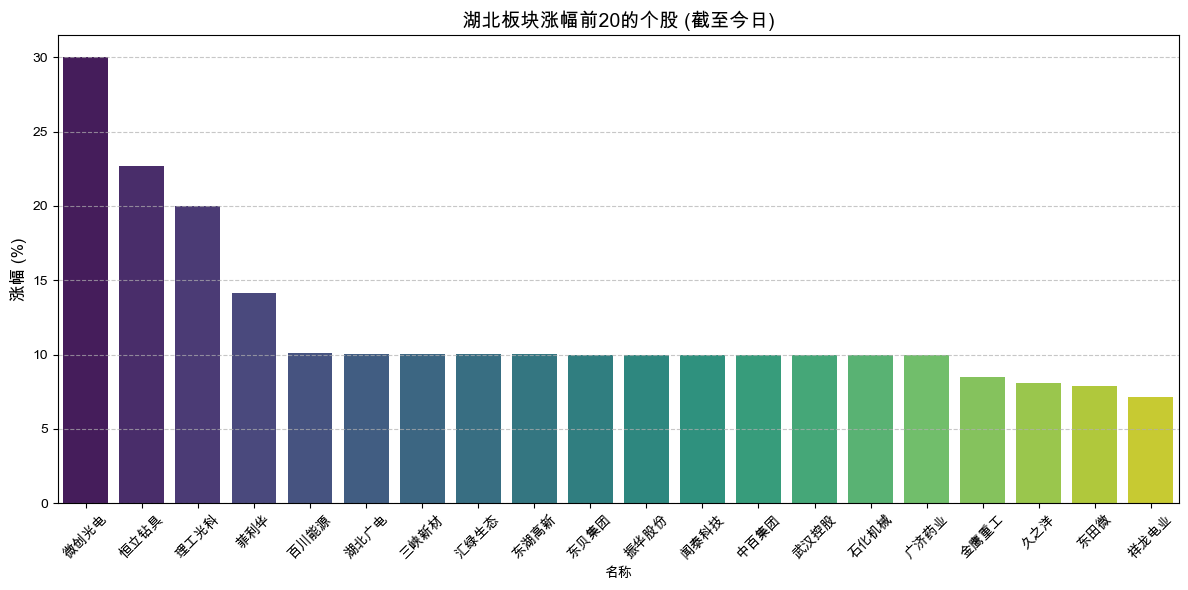

In [6]:
# 可视化：绘制涨幅前十的柱状图
plt.figure(figsize=(12, 6))
sns.barplot(data=top_gainers, x='名称', y='涨幅', palette='viridis')
plt.title('湖北板块涨幅前20的个股 (截至今日)', fontsize=14)
plt.ylabel('涨幅 (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

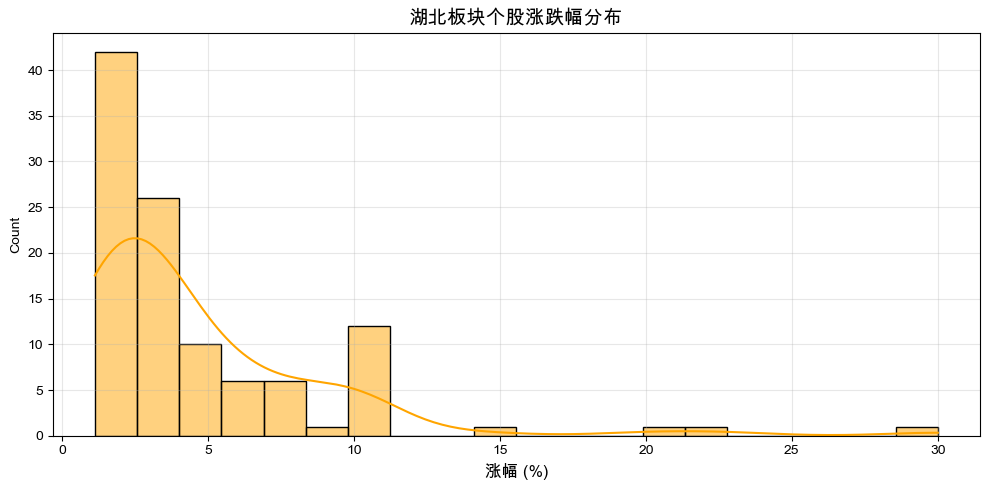

In [7]:
# 另外，我们可以绘制整个板块的涨跌幅分布图
plt.figure(figsize=(10, 5))
sns.histplot(hubei_stocks['涨幅'], bins=20, kde=True, color='orange')
plt.title('湖北板块个股涨跌幅分布', fontsize=14)
plt.xlabel('涨幅 (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()